In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

Objetivo:
Se han hecho llamadas de mk para contactar con el clientes y determinar si seria suscrito al deposito bancario.

Datos de interés:
age: edad
job: trabajo
marital: estado civil
education: nivel educativo
default: impagos en historial
contact: metodo contacto
campaign: numero de contactos para el cliente en campaña
y: suscrito al producto o no VARIABLE CLAVE.
id para concat con ID

Income: ingresos. Creo que no cambia mucho
ID para concat con id_
Dt_Customer: fecha conversion a cliente.


In [97]:
csv_path = "data/bank-additional.csv"
df_bank_additional = pd.read_csv(csv_path, index_col=0)
print(df_bank_aditional.shape)
print(df_bank_aditional.columns)
print(df_bank_aditional.dtypes)
print(df_bank_aditional.head())
print(df_bank_aditional.describe(include='all'))

FileNotFoundError: [Errno 2] No such file or directory: 'data/bank-additional.csv'

In [4]:
df_bank_aditional.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'date', 'latitude', 'longitude', 'id_'],
      dtype='object')

In [5]:
df_bank_aditional = df_bank_aditional[['age', 'job', 'marital', 'education', 'default','contact', 'campaign', 'y', 'id_']]
df_bank_aditional.head()

,age,job,marital,education,default,contact,campaign,y,id_
0,NaN,housemaid,MARRIED,basic.4y,0.0,telephone,1,no,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,NaN,telephone,1,no,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0.0,telephone,1,no,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin.,MARRIED,basic.6y,0.0,telephone,1,no,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,0.0,telephone,1,no,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [6]:
#Nulos bank-additional
round(df_bank_aditional.isna().sum() / df_bank_aditional.shape[0] * 100, 2)

age          11.91
job           0.80
marital       0.20
education     4.20
default      20.89
contact       0.00
campaign      0.00
y             0.00
id_           0.00
dtype: float64

In [7]:
#Duplicados bank-additional
df_bank_aditional = df_bank_aditional.drop_duplicates()
df_bank_aditional.duplicated().sum()

np.int64(0)

In [8]:
#Transformacion-Limpieza bankadditional
df_bank_aditional['age'] = df_bank_aditional['age'].fillna(df_bank_aditional['age'].median()) 

for col in ['job', 'marital', 'education']:
    df_bank_aditional[col] = df_bank_aditional[col].fillna('unknown')

for col in ['default']:
    df_bank_aditional[col] = df_bank_aditional[col].fillna(-1) 

df_bank_aditional['id_'] = df_bank_aditional['id_'].astype(str)

In [9]:
df_customer_details =  pd.concat(pd.read_excel(r'C:\Users\ogsem\OneDrive\Desktop\MisCosas-20250219T134938Z-001\MisCosas\THEPOWER\PYTHON EDA\ProyectoEDA\Processed_data\customer-details.xlsx', sheet_name=None), ignore_index=True)
print(df_customer_details.shape)
print(df_customer_details.columns)
print(df_customer_details.dtypes)
print(df_customer_details.head())
print(df_customer_details.describe(include='all'))


(43170, 7)
Index(['Unnamed: 0', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'NumWebVisitsMonth', 'ID'],
      dtype='object')
Unnamed: 0                    int64
Income                        int64
Kidhome                       int64
Teenhome                      int64
Dt_Customer          datetime64[ns]
NumWebVisitsMonth             int64
ID                           object
dtype: object
   Unnamed: 0  Income  Kidhome  Teenhome Dt_Customer  NumWebVisitsMonth  \
0           0  161770        1         0  2012-04-04                 29   
1           1   85477        1         1  2012-12-30                  7   
2           2  147233        1         1  2012-02-02                  5   
3           3  121393        1         2  2012-12-21                 29   
4           4   63164        1         2  2012-06-20                 20   

                                     ID  
0  089b39d8-e4d0-461b-87d4-814d71e0e079  
1  e9d37224-cb6f-4942-98d7-46672963d097  
2  3f9f49b5-e410-494

In [10]:
df_customer_details.columns

Index(['Unnamed: 0', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'NumWebVisitsMonth', 'ID'],
      dtype='object')

In [11]:
df_customer_details = df_customer_details[['Income', 'Dt_Customer', 'ID']]
df_customer_details.head()

,Income,Dt_Customer,ID
0,161770,2012-04-04,089b39d8-e4d0-461b-87d4-814d71e0e079
1,85477,2012-12-30,e9d37224-cb6f-4942-98d7-46672963d097
2,147233,2012-02-02,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,121393,2012-12-21,9991fafb-4447-451a-8be2-b0df6098d13e
4,63164,2012-06-20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [12]:
#Nulos customer_details
round(df_customer_details.isna().sum() / df_customer_details.shape[0] * 100, 2)

Income         0.0
Dt_Customer    0.0
ID             0.0
dtype: float64

In [53]:
#Duplicados customer_details
df_customer_details = df_customer_details.drop_duplicates()
df_customer_details.duplicated().sum()

np.int64(0)

In [14]:
#Transformacion-Limpieza customer-details
df_customer_details['ID'] = df_customer_details['ID'].astype(str)

In [15]:
df_bank_aditional['id_'] = df_bank_aditional['id_'].astype(str)
df_bank_aditional = df_bank_aditional.drop_duplicates()

In [16]:
df_cruzado = df_bank_aditional.merge(df_customer_details, how= 'left', left_on='id_', right_on='ID')
df_cruzado = df_cruzado.drop(columns='ID')
df_cruzado.head()

,age,job,marital,education,default,contact,campaign,y,id_,Income,Dt_Customer
0,38.0,housemaid,MARRIED,basic.4y,0.0,telephone,1,no,089b39d8-e4d0-461b-87d4-814d71e0e079,161770,2012-04-04
1,57.0,services,MARRIED,high.school,-1.0,telephone,1,no,e9d37224-cb6f-4942-98d7-46672963d097,85477,2012-12-30
2,37.0,services,MARRIED,high.school,0.0,telephone,1,no,3f9f49b5-e410-4948-bf6e-f9244f04918b,147233,2012-02-02
3,40.0,admin.,MARRIED,basic.6y,0.0,telephone,1,no,9991fafb-4447-451a-8be2-b0df6098d13e,121393,2012-12-21
4,56.0,services,MARRIED,high.school,0.0,telephone,1,no,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,63164,2012-06-20


In [17]:
df_cruzado.describe().T

,count,mean,min,25%,50%,75%,max,std
age,43000.0,39.741698,17.0,33.0,38.0,46.0,98.0,9.817735
default,43000.0,-0.208791,-1.0,0.0,0.0,0.0,1.0,0.406621
campaign,43000.0,2.567233,1.0,1.0,2.0,3.0,56.0,2.772294
Income,43000.0,93241.20007,5841.0,49610.0,93050.5,136744.5,180802.0,50498.316182
Dt_Customer,43000,2013-05-12 07:05:06.083720960,2012-01-01 00:00:00,2012-07-16 00:00:00,2013-03-02 00:00:00,2014-03-29 00:00:00,2014-12-31 00:00:00,NaN


In [18]:
df_cruzado.isna().sum()

age            0
job            0
marital        0
education      0
default        0
contact        0
campaign       0
y              0
id_            0
Income         0
Dt_Customer    0
dtype: int64

In [19]:
df_cruzado.select_dtypes('object').describe().T

,count,unique,top,freq
job,43000,12,admin.,10873
marital,43000,4,MARRIED,25999
education,43000,8,university.degree,12722
contact,43000,2,cellular,27396
y,43000,2,no,38156
id_,43000,43000,993bbbd6-4dbc-4a40-a408-f91f8462bee6,1


In [20]:
df_cruzado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   age          43000 non-null  float64       
 1   job          43000 non-null  object        
 2   marital      43000 non-null  object        
 3   education    43000 non-null  object        
 4   default      43000 non-null  float64       
 5   contact      43000 non-null  object        
 6   campaign     43000 non-null  int64         
 7   y            43000 non-null  object        
 8   id_          43000 non-null  object        
 9   Income       43000 non-null  int64         
 10  Dt_Customer  43000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 3.6+ MB


In [21]:
round(df_cruzado['y'].value_counts() / df_cruzado.shape[0] * 100, 2)

y
no     88.73
yes    11.27
Name: count, dtype: float64

ANALISIS CATEGORICO:

job:
Student y retired tienen la mayor tasa de conversión. (pero con no mucha cantidad de valores)

marital:
Single convierten más que married y divorced.

education:
Iliterate es el valor que mayor conversion tiene pero con muy pocos casos. University.degree y professional.course es mas representativo en cantidad de conversion.

contact:
El contacto por cellular es claramente más efectivo que por telephone


C:\Users\ogsem\AppData\Local\Temp\ipykernel_20712\263453549.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= tabla_job['yes'], y= tabla_job.index, palette='pastel')


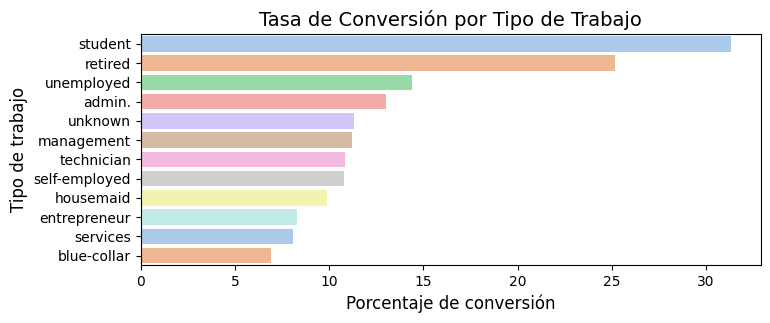

In [80]:
#VARIABLES CATEGORICAS
tabla_job = pd.crosstab(df_cruzado['job'], df_cruzado['y'], normalize='index') * 100
tabla_job = tabla_job.sort_values(by='yes', ascending=False)
plt.figure(figsize=(8,3))
sns.barplot(x= tabla_job['yes'], y= tabla_job.index, palette='pastel')

plt.title("Tasa de Conversión por Tipo de Trabajo", fontsize=14)
plt.xlabel("Porcentaje de conversión", fontsize=12)
plt.ylabel("Tipo de trabajo", fontsize=12)
plt.show()

In [69]:
tabla_job_conversion = pd.crosstab(df_cruzado['job'], df_cruzado['y'])
tabla_job_conversion['total'] = tabla_job_conversion.sum(axis=1)
tabla_job_conversion['conversion_rate'] = (tabla_job_conversion['yes'] / tabla_job_conversion['total']) * 100
tabla_job_conversion.sort_values(by='conversion_rate', ascending=False)


y,no,yes,total,conversion_rate
job,,,,
student,620,283,903,31.339978
retired,1339,451,1790,25.195531
unemployed,910,153,1063,14.393227
admin.,9458,1415,10873,13.013888
unknown,306,39,345,11.304348
management,2708,342,3050,11.213115
technician,6264,762,7026,10.845431
self-employed,1328,161,1489,10.812626
housemaid,1012,111,1123,9.884239


C:\Users\ogsem\AppData\Local\Temp\ipykernel_20712\755084711.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= tabla_marital['yes'], y= tabla_marital.index, palette='pastel')


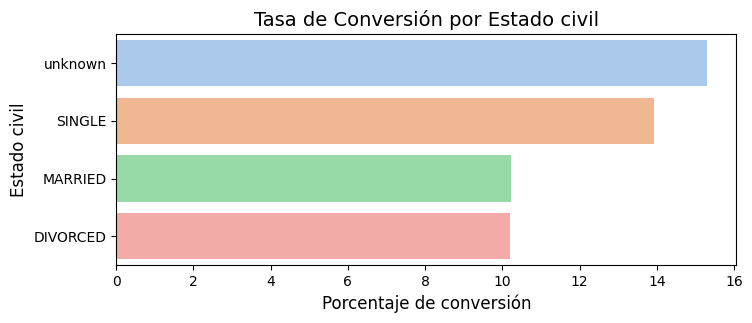

In [79]:
tabla_marital = pd.crosstab(df_cruzado['marital'], df_cruzado['y'], normalize='index') * 100
tabla_marital = tabla_marital.sort_values( by='yes', ascending=False)
plt.figure(figsize=(8,3))
sns.barplot(x= tabla_marital['yes'], y= tabla_marital.index, palette='pastel')

plt.title("Tasa de Conversión por Estado civil", fontsize=14)
plt.xlabel("Porcentaje de conversión", fontsize=12)
plt.ylabel("Estado civil", fontsize=12)
plt.show()

C:\Users\ogsem\AppData\Local\Temp\ipykernel_20712\1301710911.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= tabla_education['yes'], y= tabla_education.index, palette='pastel')


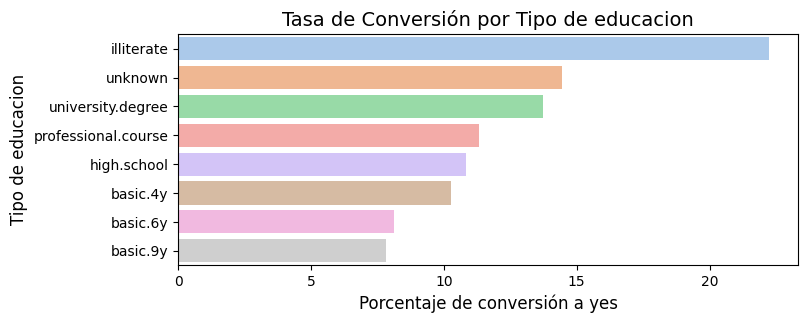

In [ ]:
tabla_education = pd.crosstab(df_cruzado['education'], df_cruzado['y'], normalize='index') * 100
tabla_education = tabla_education.sort_values( by='yes', ascending=False)
plt.figure(figsize=(8,3))
sns.barplot(x= tabla_education['yes'], y= tabla_education.index, palette='pastel')

plt.title("Tasa de Conversión por Tipo de educacion", fontsize=14)
plt.xlabel("Porcentaje de conversión", fontsize=12)
plt.ylabel("Tipo de educacion", fontsize=12)
plt.show()

In [61]:
df_cruzado['education'].value_counts()

education
university.degree      12722
high.school             9925
basic.9y                6309
professional.course     5477
basic.4y                4356
basic.6y                2386
unknown                 1807
illiterate                18
Name: count, dtype: int64

C:\Users\ogsem\AppData\Local\Temp\ipykernel_20712\3575628313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= tabla_contact['yes'], y= tabla_contact.index, palette='pastel')


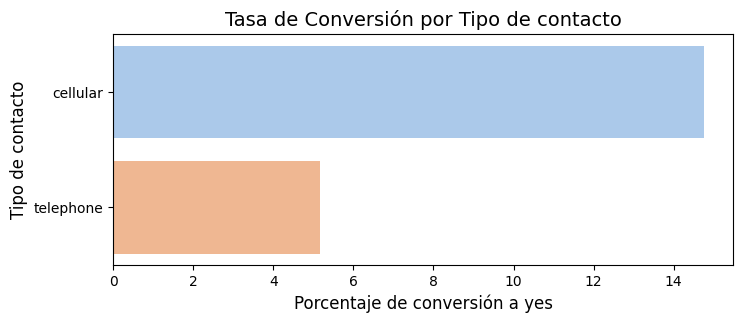

In [ ]:
tabla_contact = pd.crosstab(df_cruzado['contact'], df_cruzado['y'], normalize='index') * 100
tabla_contact = tabla_contact.sort_values( by='yes', ascending=False)
plt.figure(figsize=(8,3))
sns.barplot(x= tabla_contact['yes'], y= tabla_contact.index, palette='pastel')

plt.title("Tasa de Conversión por Tipo de contacto", fontsize=14)
plt.xlabel("Porcentaje de conversión", fontsize=12)
plt.ylabel("Tipo de contacto", fontsize=12)
plt.show()

VARIABLES NUMERICAS:

campaign:
A mayor número de contactos, menor conversión.
Los clientes que dijeron "sí" fueron contactados menos veces.

age:
Mayor conversión en edades de 61 a 100 años.
Sin embargo el tramo de 31-45 años a pesar de tener una tasa de conversion baja, aporta una gran cantidad de clientes convertidos.

Income:
Tasa de conversión uniforme entre tramos. El Income no es relevante.

age vs Income:
No hay relación clara entre edad e ingreso.

C:\Users\ogsem\AppData\Local\Temp\ipykernel_20712\1725018042.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x= tabla_tramos_edad['yes'], y= tabla_tramos_edad.index, palette= 'pastel')


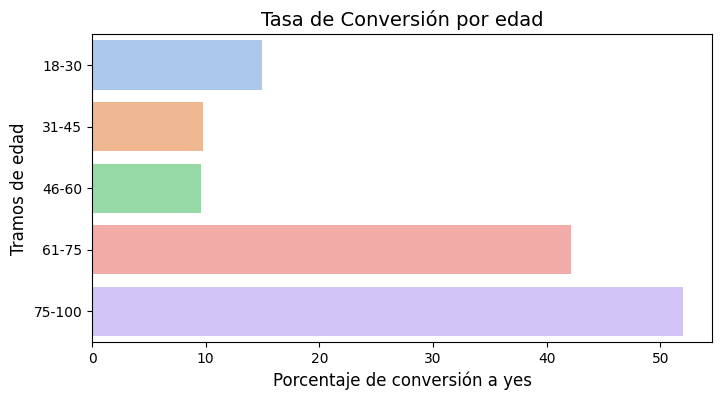

In [ ]:
#Edad: '18-30', '31-45', '46-60', '61-75', '75+'
df_cruzado['tramos_edad'] = pd.cut(df_cruzado['age'], bins= [17, 30 , 45, 60 ,75, 100], labels= ['18-30', '31-45', '46-60', '61-75', '75-100'] )
tabla_tramos_edad = pd.crosstab(df_cruzado['tramos_edad'], df_cruzado['y'], normalize='index' )* 100
plt.figure(figsize=(8,4))
sns.barplot( x= tabla_tramos_edad['yes'], y= tabla_tramos_edad.index, palette= 'pastel')

plt.title("Tasa de Conversión por edad", fontsize=14)
plt.xlabel("Porcentaje de conversión", fontsize=12)
plt.ylabel("Tramos de edad", fontsize=12)
plt.show()

In [96]:
df_cruzado['tramos_edad'].value_counts().sort_index()


tramos_edad
18-30      6866
31-45     25317
46-60      9966
61-75       615
75-100      231
Name: count, dtype: int64

C:\Users\ogsem\AppData\Local\Temp\ipykernel_20712\3818830590.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x= tabla_tramos_income['yes'], y= tabla_tramos_income.index, palette= 'pastel')


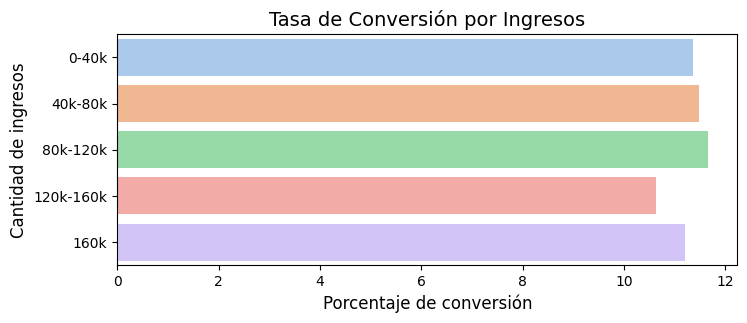

In [78]:
#Income: '0-40k', '40k-80k', '80k-120k', '120k-160k', '160k+'
df_cruzado['tramos_income'] = pd.cut(df_cruzado['Income'], bins= [0, 40000 , 80000, 120000 ,160000, df_cruzado['Income'].max()], labels= ['0-40k', '40k-80k', '80k-120k', '120k-160k', '160k'] )
tabla_tramos_income = pd.crosstab(df_cruzado['tramos_income'], df_cruzado['y'], normalize='index' ) * 100
plt.figure(figsize=(8,3))
sns.barplot( x= tabla_tramos_income['yes'], y= tabla_tramos_income.index, palette= 'pastel')

plt.title("Tasa de Conversión por Ingresos", fontsize=14)
plt.xlabel("Porcentaje de conversión", fontsize=12)
plt.ylabel("Cantidad de ingresos", fontsize=12)
plt.show()

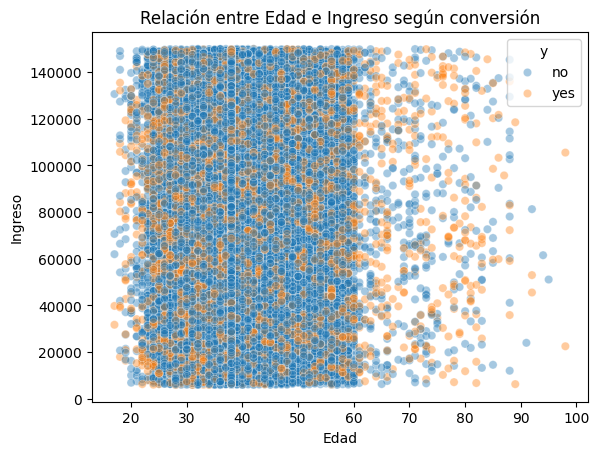

In [89]:
sns.scatterplot(data=df_cruzado[df_cruzado['Income'] < 150000], x='age', y='Income', hue='y', alpha=0.4)
plt.title("Relación entre Edad e Ingreso según conversión")
plt.xlabel("Edad")
plt.ylabel("Ingreso")
plt.show()


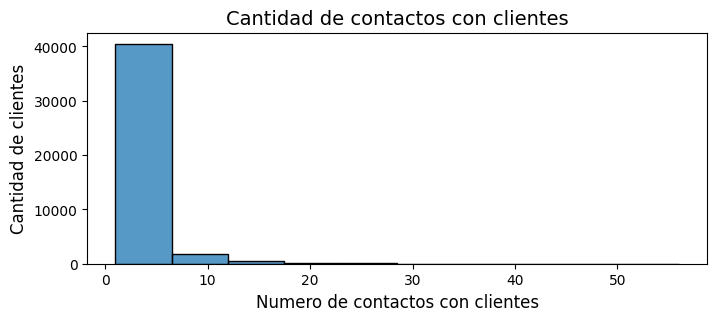

In [81]:
plt.figure(figsize=(8,3))
sns.histplot(df_cruzado['campaign'], bins=10)

plt.title("Cantidad de contactos con clientes", fontsize=14)
plt.xlabel("Numero de contactos con clientes", fontsize=12)
plt.ylabel("Cantidad de clientes", fontsize=12)
plt.show()

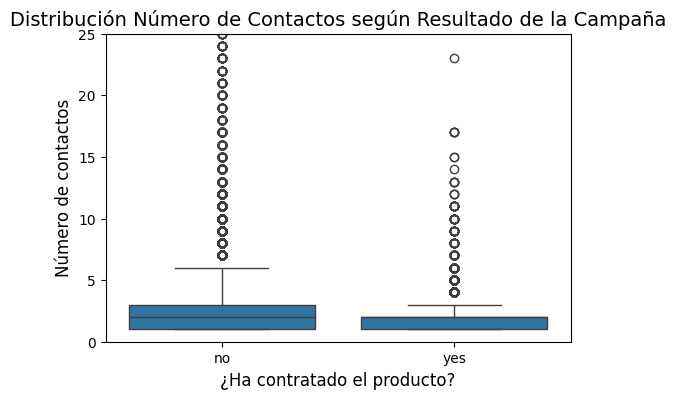

In [83]:
plt.figure(figsize=(6,4))
sns.boxplot(x= 'y', y= 'campaign', data= df_cruzado)
plt.ylim(0, 25)
plt.title("Distribución Número de Contactos según Resultado de la Campaña", fontsize=14)
plt.xlabel("¿Ha contratado el producto?", fontsize=12)
plt.ylabel("Número de contactos", fontsize=12)
plt.show()

C:\Users\ogsem\AppData\Local\Temp\ipykernel_20712\2402835715.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= conversiones_mes.values, y = conversiones_mes.index, palette='pastel')


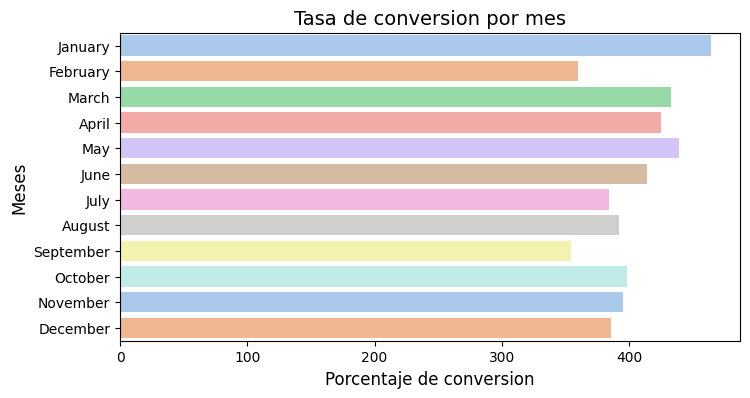

In [84]:
df_cruzado['mes_contacto'] = df_cruzado['Dt_Customer'].dt.month_name()
df_yes = df_cruzado[df_cruzado['y'] == 'yes']
conversiones_por_mes = pd.crosstab(df_cruzado['mes_contacto'], df_cruzado['y'], normalize='index') * 100
orden_meses = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']

conversiones_mes = conversiones_mes.reindex(orden_meses)

plt.figure(figsize=(8,4))
sns.barplot(x= conversiones_mes.values, y = conversiones_mes.index, palette='pastel')
plt.title("Tasa de conversion por mes", fontsize=14)
plt.xlabel("Porcentaje de conversion", fontsize=12)
plt.ylabel("Meses", fontsize=12)
plt.show()
